In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


set up the Kaggle API credentials for accessing Kaggle datasets

DATASET Link :https://www.kaggle.com/datasets/googolples/cat-dog-images/versions/1?resource=download-directory





In [ ]:
!kaggle datasets download -d googolples/cat-dog-images

ZIP FILE EXTRACTING


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-dog-images.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
import cv2
import pickle
import os
import matplotlib.pyplot as mlt
import random


In [ ]:
directory=r'/content/dataset'
categ=['cat','dog']

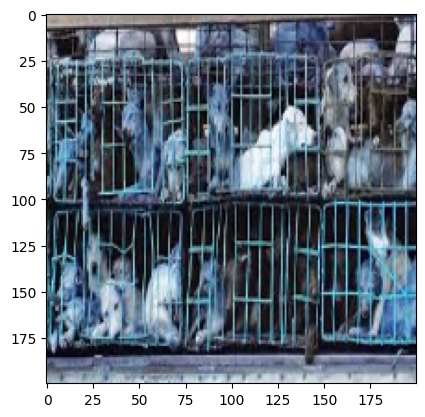

In [ ]:
img_size=200
data=[]
for cate in categ:
    folder=os.path.join(directory,cate)
    #print(folder)
    label=categ.index(cate)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
#         print(img_path)
#         break;
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(img_size,img_size))
        data.append([img_arr,label])
        mlt.imshow(img_arr)
         #break;

In [ ]:
random.shuffle(data)

In [ ]:
x=[]
y=[]
for features,labels in data:
    x.append(features)
    y.append(labels)

In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
x=x/255

In [ ]:

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128,input_shape=x.shape[1:],activation='relu'))
model.add(Dense(2,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x,y,epochs=5,validation_split=0.1)

Epoch 1/5
57/57 [==============================] - 144s 2s/step - loss: 1.1102 - accuracy: 0.5606 - val_loss: 0.6782 - val_accuracy: 0.6000
Epoch 2/5
57/57 [==============================] - 141s 2s/step - loss: 0.6452 - accuracy: 0.6417 - val_loss: 0.6590 - val_accuracy: 0.6350
Epoch 3/5
57/57 [==============================] - 140s 2s/step - loss: 0.5401 - accuracy: 0.7367 - val_loss: 0.7048 - val_accuracy: 0.5500
Epoch 4/5
57/57 [==============================] - 140s 2s/step - loss: 0.3898 - accuracy: 0.8283 - val_loss: 0.8406 - val_accuracy: 0.5600
Epoch 5/5
57/57 [==============================] - 138s 2s/step - loss: 0.2293 - accuracy: 0.9211 - val_loss: 1.1149 - val_accuracy: 0.5850


In [ ]:

def load_prep(filename,image_shape=100):
  img=cv2.imread(filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  img=cv2.resize(img,(image_shape,image_shape))
  img=img/255
  return img

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
def prep_and_plot(model,filename,classs):
  img=load_prep(filename)
  pred=model.predict(tf.expand_dims(img,axis=0))
  pred_class=classs[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False)

In [ ]:
!wget -O img.jpg https://cdn.pixabay.com/photo/2015/11/16/22/14/cat-1046544__480.jpg
prep_and_plot(model, 'img.jpg', categ)